# Imports

In [1]:
# !pip install numpy
# !pip install zarr
# !pip install seaborn
# !pip install tqdm
# !pip install ipywidgets

In [2]:
from analysis.minian import MinianAnalysis
import ipywidgets as widgets
from IPython.display import display
import functools

# Params

In [3]:
# Path to minian output
path_to_data = 'demo_movies/8 november 2021/minian/'

In [4]:
verbose = True

In [5]:
fps = 20

# Init

In [6]:
ma = MinianAnalysis(path_to_data, fps)

In [7]:
neuron=widgets.Dropdown(
    options=ma.signals.columns,
    description='neuron',
    disabled=False,
)
cold=widgets.IntSlider(
     value=15,
     min=0,
     max=100,
     step=1,
     description='cold',
     continuous_update=False,
     orientation='horizontal',
     readout=True,
     readout_format='d'
 ) 
warm=widgets.IntSlider(
     value=25,
     min=0,
     max=100,
     step=1,
     description='warm',
     continuous_update=False,
     orientation='horizontal',
     readout=True,
     readout_format='d'
 )
window=widgets.IntSlider(
     value=10,
     min=1,
     max=50,
     step=1,
     description='window',
     continuous_update=False,
     orientation='horizontal',
     readout=True,
     readout_format='d'
 )
method=widgets.Dropdown(
    options=['spike', 'full'],
    value='spike',
    description='method',
    disabled=False,
)

wid = widgets.interactive_output(ma.get_active_state, 
                       {'neuron': neuron,
                        'window': window,
                        'cold': cold,
                        'warm': warm,
                        'method': method}
                );


button = widgets.Button(description="Set parameters", 
                        button_style='success' # 'success', 'info', 'warning', 'danger', ''
                        )

def on_button_clicked(b):
    ma.find_active_state(window=window.value, cold=cold.value, warm=warm.value, method=method.value, verbose=False)

button.on_click(on_button_clicked) 


left_box = widgets.VBox([neuron, method])
center_box = widgets.VBox([cold, warm])
right_box = widgets.VBox([window, button])

display(widgets.HBox([left_box, center_box, right_box]))
display(wid)

Output()

  0%|          | 0/259 [00:00<?, ?it/s]

In [7]:
ma.save_active_states()

## Burst rate

In [12]:
max_bins = widgets.IntSlider(
    value=15,
    min=1,
    max=40,
    step=1,
    description='max_bins',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

wid = widgets.interactive_output(ma.show_burst_rate, 
                                 {'max_bins': max_bins}
                                );


button = widgets.Button(description="Save", 
                        button_style='success'
                        )

def save_burst_rate(b):
    ma.save_burst_rate()

button.on_click(save_burst_rate)

center_box = widgets.HBox([max_bins, button])

display(center_box)
display(wid)

Output()

## Network spike rate

In [13]:
period = widgets.IntSlider(
    value=1,
    min=1,
    max=60,
    step=1,
    description='period (sec)',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

wid = widgets.interactive_output(
    ma.show_network_spike_rate,
    {'period': period}
);


button = widgets.Button(description="Save", 
                        button_style='success' # 'success', 'info', 'warning', 'danger', ''
                        )

def save_network_spike_rate(b):
    ma.save_network_spike_rate(period=period.value)

button.on_click(save_network_spike_rate) 


center_box = widgets.HBox([period, button])

display(center_box)
display(wid)

Output()

## Network spike duration 

In [9]:
thresholds = [5, 10, 20 , 30, 50] # %

  0%|          | 0/5 [00:00<?, ?it/s]

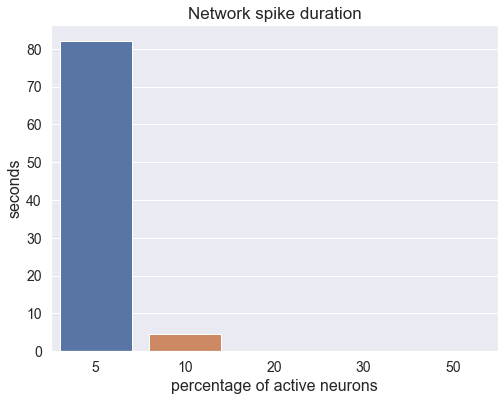

In [10]:
ma.show_network_spike_duration(thresholds)

## Network spike peak

In [14]:
period = widgets.IntSlider(
    value=1,
    min=1,
    max=60,
    step=1,
    description='period (sec)',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

wid = widgets.interactive_output(
    ma.show_network_spike_peak,
    {'period': period}
);


button = widgets.Button(description="Save", 
                        button_style='success'
                        )

def save_network_spike_peak(b):
    ma.save_network_spike_peak(period=period.value)

button.on_click(save_network_spike_peak) 


center_box = widgets.HBox([period, button])

display(center_box)
display(wid)

Output()

## Correlation

Two types of correlation are presented, which depend on the active state:
* active - Pearson correlation for binary segmentation of active states
* active_acc - ratio of intersection to union of active states

In [8]:
corr_method = widgets.Dropdown(options=['signal', 'diff', 'active', 'active_acc'])

threshold = widgets.FloatSlider(
    value=0.8,
    min=0,
    max=1,
    step=0.01,
    description='threshold',
    continuous_update=False,
    readout=True,
)


corr = widgets.interactive_output(ma.show_corr,
                                 {'method': corr_method,
                                  'threshold': threshold}
                                 );
display(widgets.HBox([corr_method, threshold]))
display(corr)

Output()

In [ ]:
ma.save_correlation_matrix(method='active')

In [ ]:
ma.save_correlation_matrix(method='signal')

In [ ]:
ma.save_correlation_matrix(method='diff')

In [ ]:
ma.save_correlation_matrix(method='active_acc')